In [1]:
import sinabs
import sinabs.layers as sl
import torch
import torch.nn as nn
import numpy as np
from math import atan2
import matplotlib.pyplot as plt
from scipy.special import iv

In [2]:
r0 = 10
num_ori = 4
theta0 = np.arange(0, 360, 180/ num_ori)
# theta0 = np.array([0., 90., 180., 270.])
theta0

array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

In [3]:
def make_von_mises(width, height, r0, theta0, filt_type='NORMAL', w=1.0, w2=1.0):
    von_mises = np.empty((int(height), int(width)))
    for x in range(von_mises.shape[1]):
        for y in range(von_mises.shape[0]):
            X = x - von_mises.shape[1] / 2
            Y = -(y - von_mises.shape[0] / 2)
            if filt_type == 'CENTERED':
                X += r0 * np.cos(theta0)
                Y += r0 * np.sin(theta0)
            elif filt_type == 'OPPOSITE':
                X += 2 * r0 * np.cos(theta0)
                Y += 2 * r0 * np.sin(theta0)
            r = np.sqrt(X ** 2 + Y ** 2)
            theta = atan2(Y, X)
            von_mises[y, x] = np.exp(r0 * w * np.cos(theta - theta0)) / iv(0, w2 * (r - r0))
    return von_mises

In [63]:
von_mises = np.array([make_von_mises(5, 5, r0, theta) for theta in theta0])

In [64]:
von_mises.shape

(8, 5, 5)

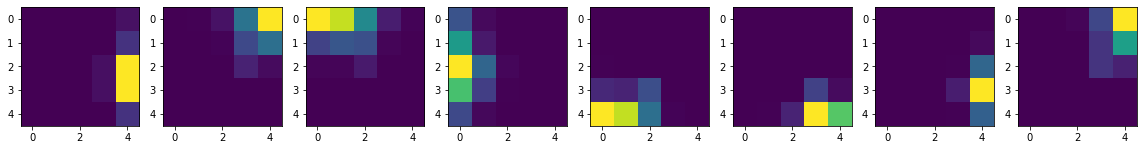

In [65]:
fix, axes = plt.subplots(1, von_mises.shape[0], figsize=(20, 3))

for ax, filter in zip(axes, von_mises):
    ax.imshow(filter,)# cmap='gray')

In [7]:
events = np.load('twoobjects.npy')

In [15]:
torch.tensor(events)

tensor([[4.2100e+02, 1.2500e+02, 0.0000e+00, 0.0000e+00],
        [5.5300e+02, 7.3000e+01, 0.0000e+00, 3.0000e-06],
        [2.6000e+02, 2.8800e+02, 1.0000e+00, 7.9000e-05],
        ...,
        [2.7200e+02, 3.8100e+02, 0.0000e+00, 6.7456e+00],
        [2.3700e+02, 3.2900e+02, 0.0000e+00, 6.7456e+00],
        [2.5300e+02, 1.4400e+02, 1.0000e+00, 6.7456e+00]], dtype=torch.float64)

In [16]:
net = nn.Sequential(
    sl.IAF()
    
)

In [17]:
import matplotlib.pyplot as plt

input = torch.rand((1, 1, 128, 128))

conv_module = torch.nn.Conv2d(1, 3, (10, 10))

In [19]:
conv_module.weight

torch.Size([3, 1, 10, 10])

In [21]:
conv_module(input).shape

torch.Size([1, 3, 119, 119])

In [26]:
Drawing_colored_circle = plt.Circle(( 0.6 , 0.6 ), 0.2 )

In [91]:
width, height = 20, 20
a, b = 8, 8
r = 5
EPSILON = 2.2

circle = [[0 for x in range(width)] for y in range(height)]

# draw the circle
for y in range(height):
    for x in range(width):
        # see if we're close to (x-a)**2 + (y-b)**2 == r**2
        if abs((x-a)**2 + (y-b)**2 - r**2) < EPSILON**2:
            circle[y][x] = 1


# unsqueeze 'extends' our tensor by a dimension of 1 at a specific location so that the data is in the format that pytorch expects
# https://pytorch.org/docs/stable/generated/torch.unsqueeze.html

circle = torch.tensor(circle).unsqueeze(0).unsqueeze(0).float()

In [93]:
circle

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [110]:
conv_module = torch.nn.Conv2d(1, 1, (5, 5), bias=False, padding=2)

In [111]:

filter = torch.eye(5).unsqueeze(0).unsqueeze(0)
filter

tensor([[[[1., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 1.]]]])

In [112]:
conv_module.weight.data.shape

torch.Size([1, 1, 5, 5])

In [113]:
conv_module.weight.data = filter

In [114]:
conv_module

Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)

In [115]:
output = conv_module(circle)

In [116]:
output = output.squeeze()

In [117]:
output.shape

torch.Size([20, 20])

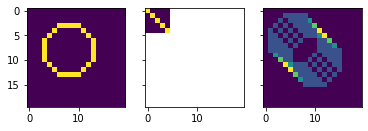

In [118]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)
axes[0].imshow(circle.squeeze())
axes[1].imshow(filter.squeeze())
axes[2].imshow(output.detach().numpy())

In [119]:
output

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 1., 1., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 3., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 4., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 2., 4., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 3., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 2., 0., 0., 0.,
         0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
         0., 0.],
        [0., 0., 2., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
         0., 0.],
        [0

## define network architecture

In [ ]:
network = nn.Sequential(
    conv_module,
    sinabs.layers.IAF(),
    nn.Conv2d(1, 3, (10, 10), bias=False), # keep adding new layers for higher level of abstraction / lower spatial resolution
)